In [20]:
!conda install -y graphviz

Solving environment: done

## Package Plan ##

  environment location: /Users/manishanker.talusani/opt/anaconda3

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.14.12              |    h9d4d9ac_1005         1.3 MB  conda-forge
    conda-4.8.3                |   py37hc8dfbb8_1         3.0 MB  conda-forge
    fontconfig-2.13.1          |    h1027ab8_1000         269 KB  conda-forge
    fribidi-1.0.5              |    h01d97ff_1002          62 KB  conda-forge
    graphite2-1.3.13           |    h2098e52_1000          84 KB  conda-forge
    graphviz-2.40.1            |       hefbbd9a_2         6.3 MB
    harfbuzz-1.8.8             |       hb8d4a28_0         414 KB
    pango-1.42.4               |       h060686c_0         455 KB
    pixman-0.34.0              |    h1de35cc_1003         597 KB  conda-forge
    ---------------------------------

# load the csv file. Do basic check. shape, na values, types of columns, information, plot basic histogram and bar plot

In [79]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report

In [44]:
# load dataset
pima = pd.read_csv("/Users/manishanker.talusani/Downloads/diabetes_zip/data/diabetes_csv.csv")

In [45]:
pima.head()

,preg,plas,pres,skin,insu,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,tested_positive
1,1,85,66,29,0,26.6,0.351,31,tested_negative
2,8,183,64,0,0,23.3,0.672,32,tested_positive
3,1,89,66,23,94,28.1,0.167,21,tested_negative
4,0,137,40,35,168,43.1,2.288,33,tested_positive


In [46]:
#split dataset in features and target variable
#feature_cols = ['Pregnancies', 'Insulin', 'BMI', 'Age','Glucose','BloodPressure', 
#                'SkinThickness', 'DiabetesPedigreeFunction']
X = pima.drop(["class"], axis=1) # Features
y = pima["class"] # Target variable

In [47]:
y.value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

In [48]:
X.describe()

,preg,plas,pres,skin,insu,mass,pedi,age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [71]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, stratify=None)# 70% training and 30% test

In [64]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [65]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6623376623376623


In [83]:
y_pred_train = clf.predict(X_train)

In [84]:
print("Train Accuracy:",metrics.accuracy_score(y_pred_train, y_train))

Train Accuracy: 0.8938547486033519


In [81]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

tested_negative       0.66      0.70      0.68       150
tested_positive       0.38      0.33      0.35        81

       accuracy                           0.57       231
      macro avg       0.52      0.52      0.52       231
   weighted avg       0.56      0.57      0.57       231



In [72]:
y_test.value_counts()

tested_negative    150
tested_positive     81
Name: class, dtype: int64

In [73]:
y_train.value_counts()

tested_negative    350
tested_positive    187
Name: class, dtype: int64

In [74]:
y.value_counts()

tested_negative    500
tested_positive    268
Name: class, dtype: int64

In [75]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus

In [76]:
354/ (354 + 183)

0.659217877094972

In [77]:
500/ (500 + 268)

0.6510416666666666

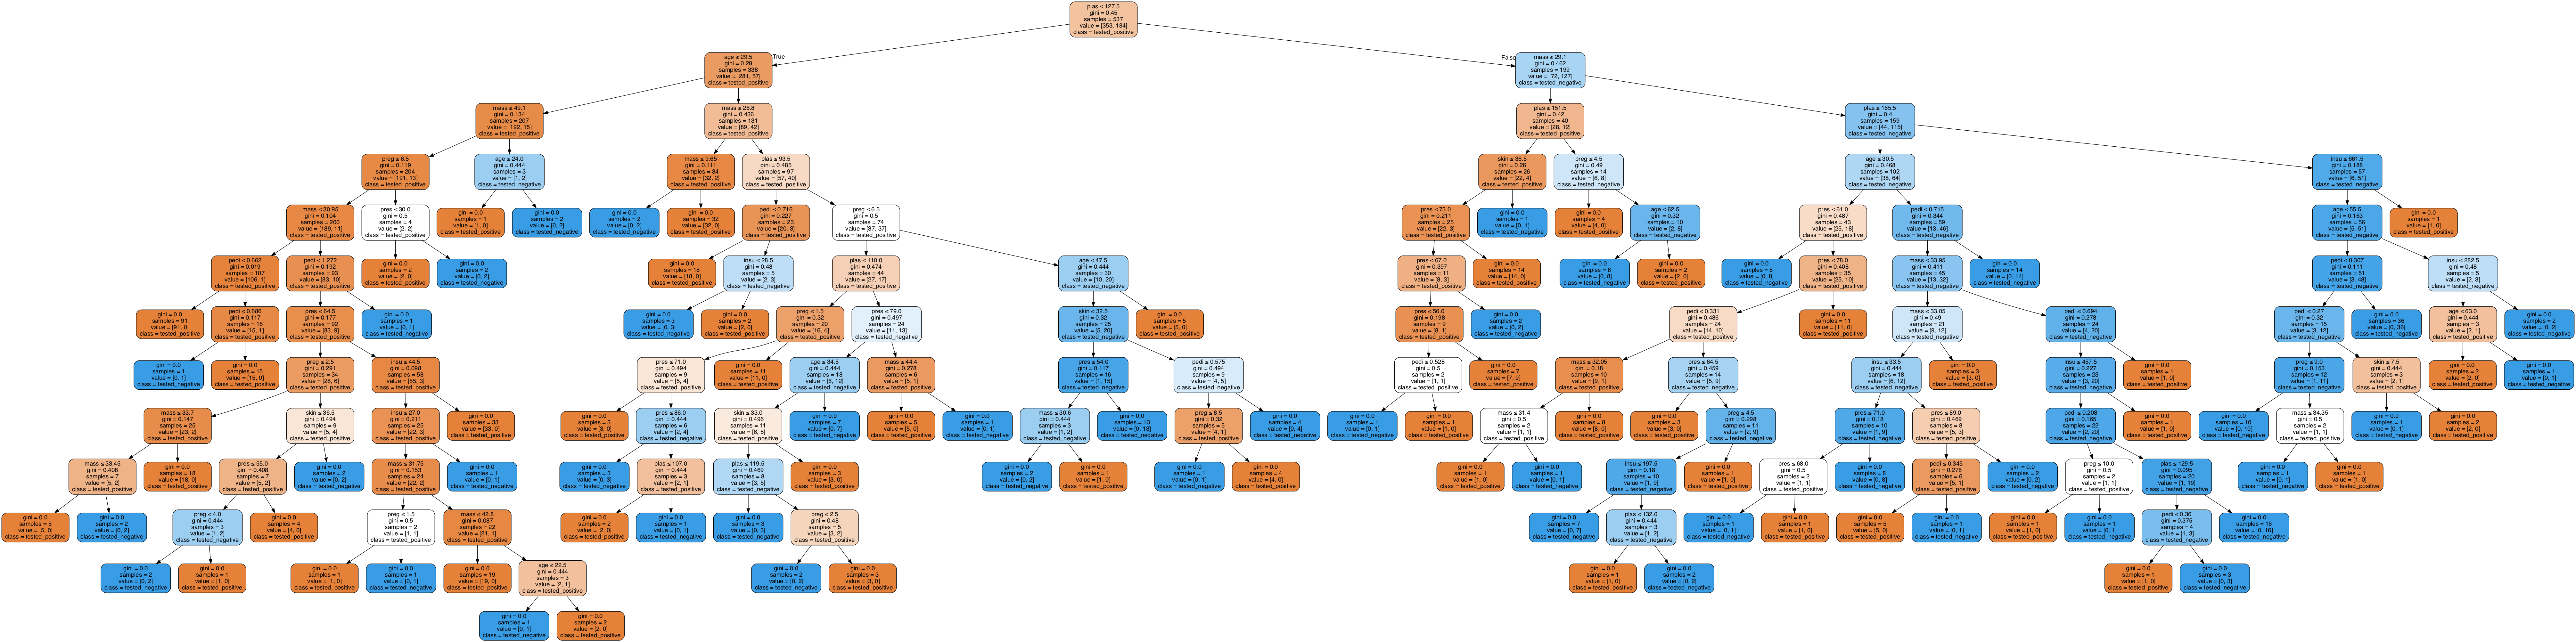

In [78]:
dot_data = StringIO()
export_graphviz(clf, 
                out_file=dot_data,  
                filled=True, 
                rounded=True,
                special_characters=True,
                feature_names = X.columns,
                class_names=['tested_positive','tested_negative'])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())

In [82]:
!pwd

/Users/manishanker.talusani/Statistics_ML_26Aug


In [85]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7186147186147186


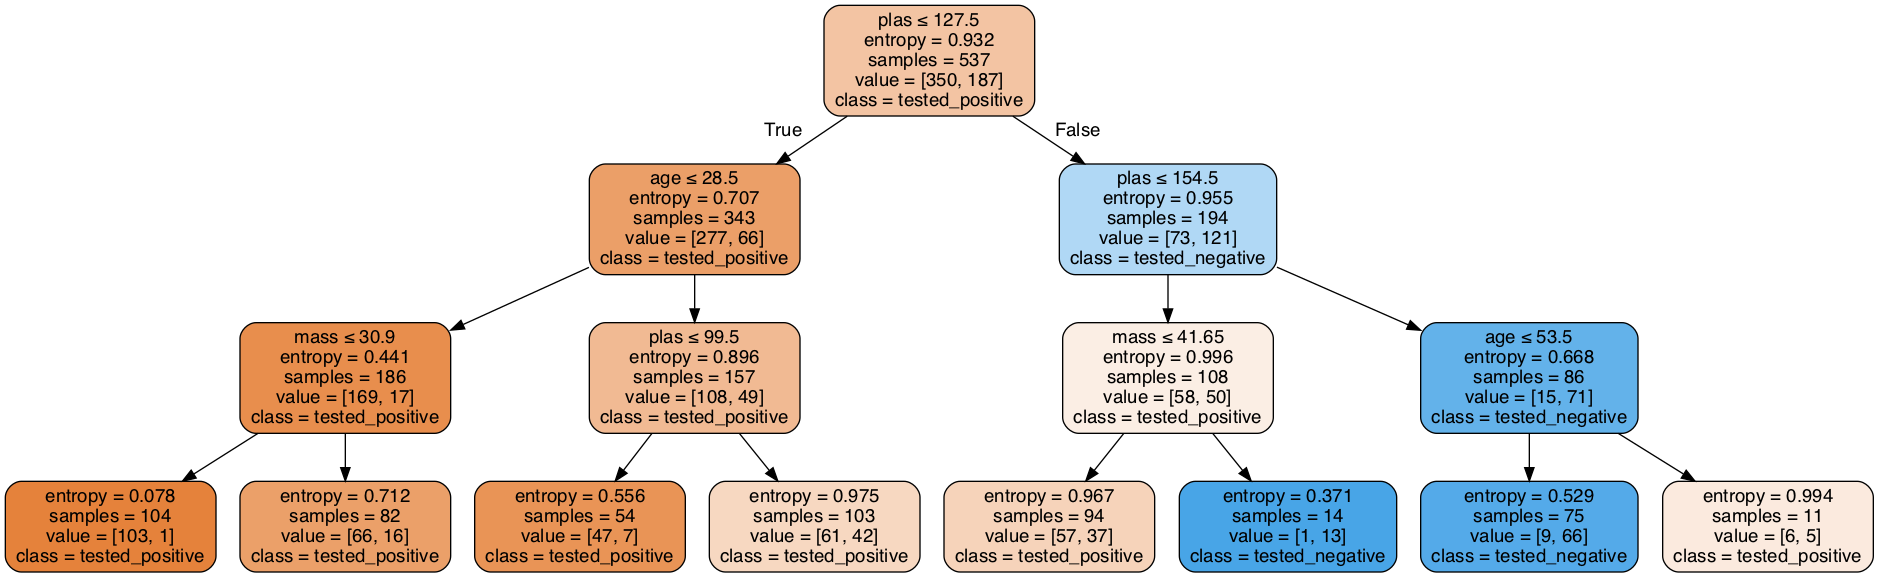

In [86]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus
dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True, feature_names = X.columns,
                class_names=['tested_positive','tested_negative'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes_pruned.png')
Image(graph.create_png())

In [36]:
from sklearn.ensemble import RandomForestClassifier
clf_random_forest = RandomForestClassifier(n_estimators=170)
clf_random_forest.fit(X_train, y_train)
y_pred = clf_random_forest.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7922077922077922


In [37]:
from sklearn.svm import SVC
clf_svm = SVC()
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.6320346320346321


/Users/manishanker.talusani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [38]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_std = scaler.fit_transform(X)
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.3, random_state=1) # 70% training and 30% test
from sklearn.svm import SVC
clf_svm = SVC(C=5)
clf_svm.fit(X_train, y_train)
y_pred = clf_svm.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7835497835497836


/Users/manishanker.talusani/opt/anaconda3/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [39]:
X_train

array([[ 3.31264542,  0.47275805,  0.04624525, ...,  0.64823013,
        -0.96304428,  0.83038113],
       [-1.14185152, -0.74783062, -0.26394125, ...,  0.61015436,
         0.38694877, -0.70119842],
       [-0.84488505, -0.15318486,  0.04624525, ..., -0.58288655,
        -0.80901822, -1.04154944],
       ...,
       [ 2.7187125 ,  0.1597866 ,  1.08020025, ...,  1.44782138,
         0.33560676,  0.74529338],
       [ 0.04601433,  1.56815814,  0.14964075, ...,  1.47320522,
         0.02151441, -0.61611067],
       [ 1.53084665, -0.59134489,  0.35643175, ...,  0.1151693 ,
         0.58325649,  1.08564439]])

In [40]:
from sklearn.linear_model import LogisticRegression
clf_logistic = LogisticRegression()
clf_logistic = clf_logistic.fit(X_train, y_train)
y_pred = clf_logistic.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7835497835497836


/Users/manishanker.talusani/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [41]:
!pwd

/Users/manishanker.talusani/Statistics_ML_26Aug


In [42]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7012987012987013
